In [1]:
# simple polynomial regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

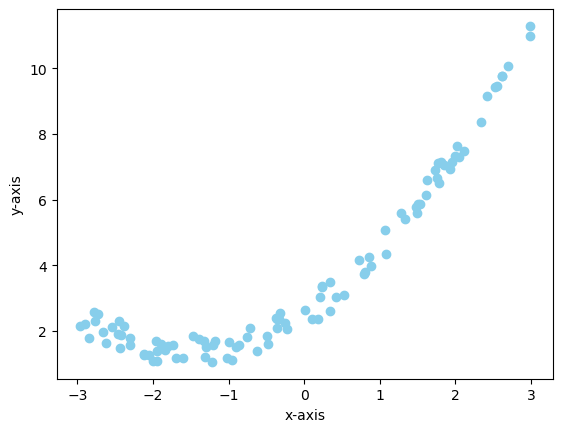

In [2]:
# generating dummie data

X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + 1.5 * X + 2 + np.random.rand(100, 1)

plt.scatter(X,y,color='skyblue')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

In [3]:
# train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [4]:
# polynomial transforamtion

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit(X_train)

X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

In [7]:
# model fitting

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train_poly,y_train)

LinearRegression()

In [8]:
# y prtediction 

y_pred = model.predict(X_test_poly)
y_pred

array([[ 2.03414424],
       [ 2.3261466 ],
       [ 6.60081999],
       [ 5.81066672],
       [ 6.68033497],
       [ 4.61068079],
       [ 1.60193962],
       [ 1.746874  ],
       [ 9.69556299],
       [ 2.49962439],
       [ 2.39772023],
       [ 2.06780698],
       [ 1.60801474],
       [ 1.51896004],
       [10.00422783],
       [ 8.91316113],
       [ 6.16007505],
       [ 1.69968472],
       [ 9.41717927],
       [ 1.45665115]])

In [9]:
# performace metrics

from sklearn.metrics import r2_score

score = r2_score(y_test,y_pred)
score

0.9916563530322748

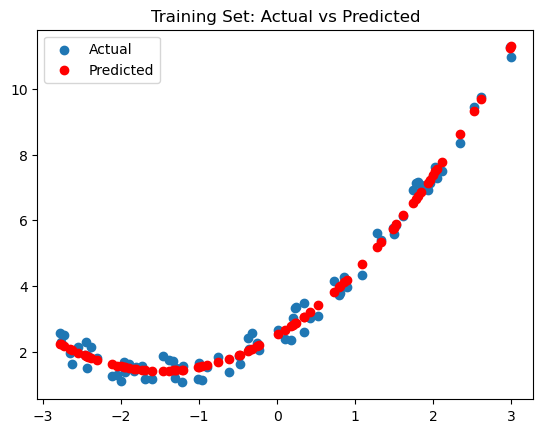

In [23]:
# plotting BEST FIT LINE (CURVE)

y_pred_train = model.predict(X_train_poly)
plt.scatter(X_train, y_train, label="Actual")
plt.scatter(X_train, y_pred_train, color='red', label="Predicted")
plt.title("Training Set: Actual vs Predicted")
plt.legend()
plt.show()

In [17]:
# prediction on new data

X_new = np.linspace(-3,3,100).reshape(200,1)

X_new_poly = poly.transform(X_new)

y_new = model.predict(X_new_poly)

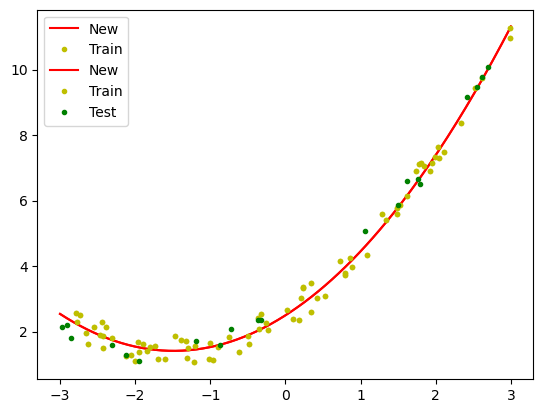

In [21]:
# plotting

plt.plot(X_new,y_new,'r-',label='New')
plt.plot(X_train,y_train,'y.',label='Train')
plt.plot(X_test,y_test,'g.',label='Test')
plt.legend()
plt.show()